In [1]:
import numpy as np
from apyori import apriori
import pandas as pd

#for visualization
import matplotlib.pyplot as plt
from tabulate import tabulate
from wordcloud import WordCloud

In [2]:
data = pd.read_csv(
    "Market_Basket_Optimisation.csv",
    header=None,
    names=[f"item_{x}" for x in range(1, 21)]
)

In [3]:
data

,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,item_10,item_11,item_12,item_13,item_14,item_15,item_16,item_17,item_18,item_19,item_20
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
products = data.melt()["value"].dropna().sort_values()

products[products.str.contains("^\s|\s$")].to_list()

[' asparagus']

In [5]:
products.replace(" asparagus", "asparagus", inplace=True)

Text(0, 0.5, 'Number of Transactions Made')

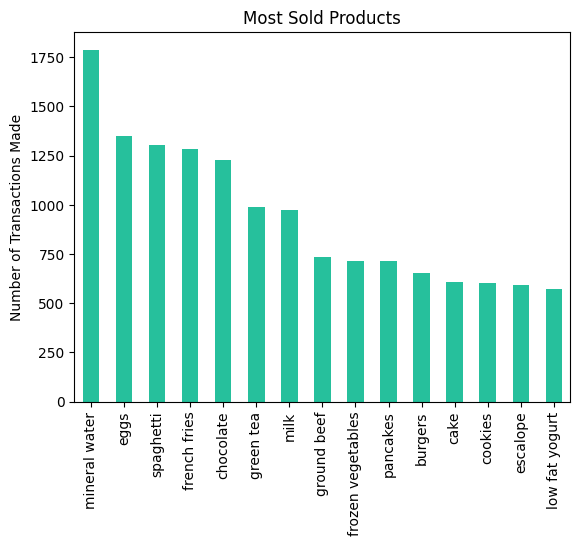

In [6]:
iCount = products.value_counts()
ax = iCount.nlargest(15).plot(kind="bar", title="Most Sold Products", color="#26C09C")
ax.set_ylabel("Number of Transactions Made")

Text(0, 0.5, 'Number of Transactions Made')

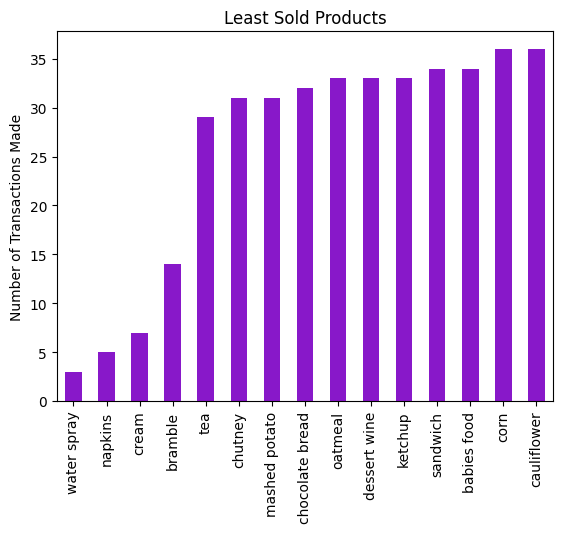

In [7]:
ax = iCount.nsmallest(15).plot(kind="bar", title="Least Sold Products", color="#8818C9")
ax.set_ylabel("Number of Transactions Made")

In [8]:
data2 = data.replace(np.nan, 0)

In [9]:
data2

,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,item_10,item_11,item_12,item_13,item_14,item_15,item_16,item_17,item_18,item_19,item_20
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,chutney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,turkey,avocado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,mineral water,milk,energy bar,whole wheat rice,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7498,chicken,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7499,escalope,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


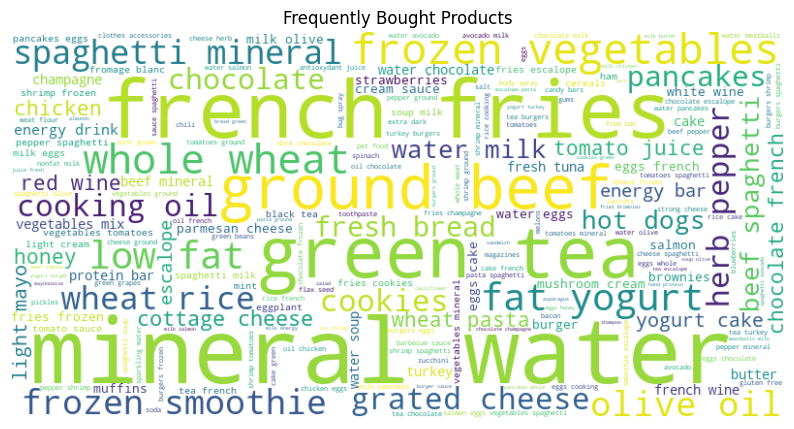

In [10]:
orders = []
for i in range(len(data2)):
    orders.append(','.join([str(product) for product in data2.iloc[i] if str(product) != '0']))
    
text = ' '.join(orders)

cloud = WordCloud(height=400, width=800, background_color="white").generate(text)

plt.figure(figsize=(10,6))
plt.axis('off')
plt.imshow(cloud, interpolation='bilinear')
plt.title('Frequently Bought Products')
plt.show()

In [11]:
listOfItem = []
for j in range(1, 7501):
    listOfItem.append([str(data2.values[j,i]) for i in range(0,20)])

In [12]:
associationRules = apriori(listOfItem, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
associationResults = list(associationRules)

In [13]:
for i in range(0, len(associationResults)):
    print(associationResults[i][0])

frozenset({'chicken', 'light cream'})
frozenset({'escalope', 'mushroom cream sauce'})
frozenset({'pasta', 'escalope'})
frozenset({'ground beef', 'herb & pepper'})
frozenset({'ground beef', 'tomato sauce'})
frozenset({'olive oil', 'whole wheat pasta'})
frozenset({'shrimp', 'pasta'})
frozenset({'0', 'chicken', 'light cream'})
frozenset({'0', 'escalope', 'mushroom cream sauce'})
frozenset({'0', 'pasta', 'escalope'})
frozenset({'0', 'herb & pepper', 'ground beef'})
frozenset({'0', 'tomato sauce', 'ground beef'})
frozenset({'0', 'olive oil', 'whole wheat pasta'})
frozenset({'0', 'shrimp', 'pasta'})
frozenset({'shrimp', 'frozen vegetables', 'chocolate'})
frozenset({'ground beef', 'cooking oil', 'spaghetti'})
frozenset({'ground beef', 'frozen vegetables', 'spaghetti'})
frozenset({'milk', 'frozen vegetables', 'olive oil'})
frozenset({'mineral water', 'shrimp', 'frozen vegetables'})
frozenset({'frozen vegetables', 'olive oil', 'spaghetti'})
frozenset({'shrimp', 'frozen vegetables', 'spaghetti'}

In [14]:
for item in associationResults:
    p = item[0]
    items = [a for a in  p]
    
    print("Rule: " + items[0] + " -> " + items[1])
    
    print("Support: " + str(item[1]))
    
    print("Confidence: " + str(item[2][0][2]))
    
    print("Lift: " + str(item[2][0][3]))
    
    print("**************************************************")

Rule: chicken -> light cream
Support: 0.004533333333333334
Confidence: 0.2905982905982906
Lift: 4.843304843304844
**************************************************
Rule: escalope -> mushroom cream sauce
Support: 0.005733333333333333
Confidence: 0.30069930069930073
Lift: 3.7903273197390845
**************************************************
Rule: pasta -> escalope
Support: 0.005866666666666667
Confidence: 0.37288135593220345
Lift: 4.700185158809287
**************************************************
Rule: ground beef -> herb & pepper
Support: 0.016
Confidence: 0.3234501347708895
Lift: 3.2915549671393096
**************************************************
Rule: ground beef -> tomato sauce
Support: 0.005333333333333333
Confidence: 0.37735849056603776
Lift: 3.840147461662528
**************************************************
Rule: olive oil -> whole wheat pasta
Support: 0.008
Confidence: 0.2714932126696833
Lift: 4.130221288078346
**************************************************
Rule: shrim

In [15]:
results = []
for item in associationResults:
    p = item[0]
    items = [a for a in  p]
    supportValue = item[1]
    confidenceValue = item[2][0][2]
    liftValue = item[2][0][3]
    results.append([', '.join(items), supportValue, confidenceValue, liftValue])
    
header= ["Rules", "Support Values", "Confidence Values", "Lift Values"]
print(tabulate(results, headers=header))

Rules                                                   Support Values    Confidence Values    Lift Values
----------------------------------------------------  ----------------  -------------------  -------------
chicken, light cream                                        0.00453333             0.290598        4.8433
escalope, mushroom cream sauce                              0.00573333             0.300699        3.79033
pasta, escalope                                             0.00586667             0.372881        4.70019
ground beef, herb & pepper                                  0.016                  0.32345         3.29155
ground beef, tomato sauce                                   0.00533333             0.377358        3.84015
olive oil, whole wheat pasta                                0.008                  0.271493        4.13022
shrimp, pasta                                               0.00506667             0.322034        4.51449
0, chicken, light cream               

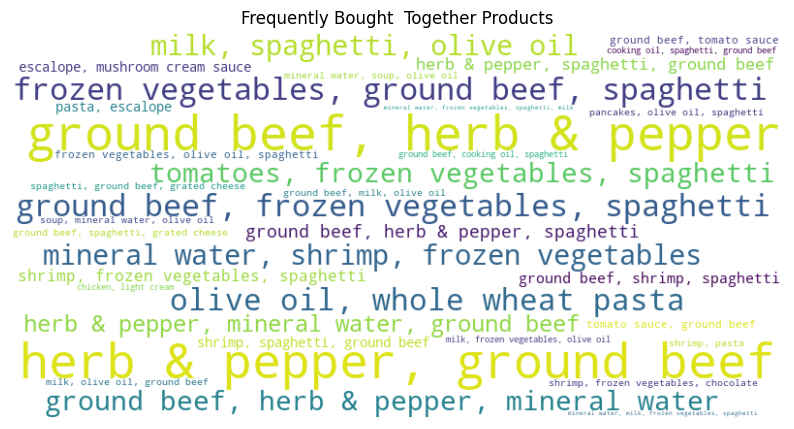

In [16]:
itemfreq = {}

for sets in associationResults:
    filtered = [product for product in sets[0] if product != '0']
    items = ', '.join(filtered)
    sup = sets[1]
    itemfreq[items] = sup
    
cloud = WordCloud(height=400, width=800, background_color="white").generate_from_frequencies(itemfreq)

plt.figure(figsize=(10,6))
plt.axis('off')
plt.imshow(cloud, interpolation='bilinear')
plt.title('Frequently Bought  Together Products')
plt.show()